In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import glob
import os


In [10]:
def extract_label_real(img_path):
    filename, _ = os.path.splitext(os.path.basename(img_path)) # path basename and postfix

    subject_id, etc = filename.split("__")
    gender, lr, finger_idx, _ = etc.split("_") # gender, lr, finger_idx, "finger"

    gender = 0 if gender == "M" else 1
    lr = 0 if lr == "Left" else 1
    
    if finger_idx == "thumb":
        finger_idx = 0

    elif finger_idx == "index":
        finger_idx = 1

    elif finger_idx == "middle":
        finger_idx = 2

    elif finger_idx == "ring":
        finger_idx = 3

    elif finger_idx == "little":
        finger_idx = 4

    return np.array([subject_id, gender, lr, finger_idx], dtype=np.uint16)


def extract_label_altered(img_path):
    filename, _ = os.path.splitext(os.path.basename(img_path)) # path basename and postfix

    subject_id, etc = filename.split("__")
    gender, lr, finger_idx, _, _ = etc.split("_") # gender, lr, finger_idx, "finger", modification method

    gender = 0 if gender == "M" else 1
    lr = 0 if lr == "Left" else 1
    
    if finger_idx == "thumb":
        finger_idx = 0

    elif finger_idx == "index":
        finger_idx = 1

    elif finger_idx == "middle":
        finger_idx = 2

    elif finger_idx == "ring":
        finger_idx = 3

    elif finger_idx == "little":
        finger_idx = 4

    return np.array([subject_id, gender, lr, finger_idx], dtype=np.uint16)

## Real Dataset Preprocessing

Real img length : 6000


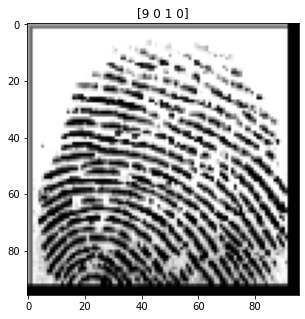

In [12]:
DATA_PATH = os.path.abspath("..\\..\\00_MLDL\\00_BreadBrother\\03_Fingerprint_Recognition\\SOCOFing")

img_list = sorted(glob.glob(os.path.join(DATA_PATH, "Real", "*.BMP")))
print(f"Real img length : {len(img_list)}")

imgs = np.empty((len(img_list), 96, 96), dtype=np.uint8)
labels = np.empty((len(img_list), 4), dtype=np.uint16)

for i, img_path in enumerate(img_list):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE) # Source img size = 96, 103
    img = cv2.resize(img, (96, 96))
    imgs[i] = img

    labels[i] = extract_label_real(img_path)


np.save(os.path.join(DATA_PATH, "preprocessed_dataset\\x_real.npy"), imgs)
np.save(os.path.join(DATA_PATH, "preprocessed_dataset\\y_real.npy"), labels)

plt.figure(figsize=(5,5))
plt.title(labels[-1])
plt.imshow(imgs[-1], cmap="gray")



## Alter Data Preprocessing

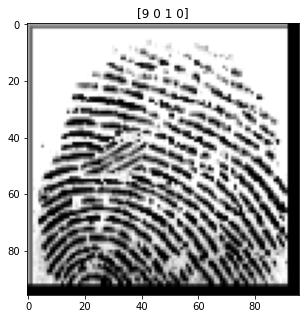

In [18]:
altered_img_list = sorted(glob.glob(os.path.join(DATA_PATH, "Altered\\Altered-Easy\\*.BMP")))
print(f"Altered-Easy img length : {len(altered_img_list)}")

imgs = np.empty((len(altered_img_list), 96, 96), dtype=np.uint8)
labels = np.empty((len(altered_img_list), 4), dtype=np.uint16)

for i, img_path in enumerate(altered_img_list):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE) # Source img size = 96, 103
    img = cv2.resize(img, (96, 96))

    imgs[i] = img

    labels[i] = extract_label_altered(img_path)


np.save(os.path.join(DATA_PATH, "preprocessed_dataset\\x_easy.npy"), imgs)
np.save(os.path.join(DATA_PATH, "preprocessed_dataset\\y_easy.npy"), labels)

plt.figure(figsize=(5,5))
plt.subplot(1,1,1)
plt.title(f"{labels[-1]}")
plt.imshow(imgs[-1], cmap="gray")

Altered-Medium img length : 17067


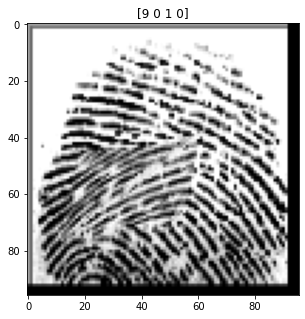

In [20]:
altered_img_list = sorted(glob.glob(os.path.join(DATA_PATH, "Altered\\Altered-Medium\\*.BMP")))
print(f"Altered-Medium img length : {len(altered_img_list)}")

imgs = np.empty((len(altered_img_list), 96, 96), dtype=np.uint8)
labels = np.empty((len(altered_img_list), 4), dtype=np.uint16)

for i, img_path in enumerate(altered_img_list):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE) # Source img size = 96, 103
    img = cv2.resize(img, (96, 96))

    imgs[i] = img

    labels[i] = extract_label_altered(img_path)


np.save(os.path.join(DATA_PATH, "preprocessed_dataset\\x_medium.npy"), imgs)
np.save(os.path.join(DATA_PATH, "preprocessed_dataset\\y_medium.npy"), labels)

plt.figure(figsize=(5,5))
plt.subplot(1,1,1)
plt.title(f"{labels[-1]}")
plt.imshow(imgs[-1], cmap="gray")

Altered-Hard img length : 14272


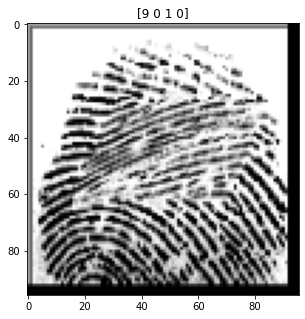

In [21]:
altered_img_list = sorted(glob.glob(os.path.join(DATA_PATH, "Altered\\Altered-Hard\\*.BMP")))
print(f"Altered-Hard img length : {len(altered_img_list)}")

imgs = np.empty((len(altered_img_list), 96, 96), dtype=np.uint8)
labels = np.empty((len(altered_img_list), 4), dtype=np.uint16)

for i, img_path in enumerate(altered_img_list):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE) # Source img size = 96, 103
    img = cv2.resize(img, (96, 96))

    imgs[i] = img

    labels[i] = extract_label_altered(img_path)


np.save(os.path.join(DATA_PATH, "preprocessed_dataset\\x_hard.npy"), imgs)
np.save(os.path.join(DATA_PATH, "preprocessed_dataset\\y_hard.npy"), labels)

plt.figure(figsize=(5,5))
plt.subplot(1,1,1)
plt.title(f"{labels[-1]}")
plt.imshow(imgs[-1], cmap="gray")